# Exploratory data analysis

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv("complaints-2020-01-22_08_24.csv")

In [3]:
data = all_data.drop(columns=["Complaint ID"]) #...
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485696,05/17/15,Debt collection,Payday loan,False statements or representation,Impersonated an attorney or official,This account was a payday loan from the XXXX X...,None,Second Round Limited Partnership,ID,836XX,Older American,Consent provided,Web,05/17/15,Closed,Yes,No
485697,09/03/15,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,We had a mortgage with XXXX that was discharge...,None,"Seterus, Inc.",MD,210XX,None,Consent provided,Web,09/03/15,Closed with explanation,Yes,No
485698,03/12/16,Consumer Loan,Vehicle loan,Managing the loan or lease,None,I have 2003 XXXX financed through United Auto ...,None,United PanAm Financial Corp.,TX,750XX,None,Consent provided,Web,03/12/16,Closed with non-monetary relief,Yes,No
485699,07/11/16,Consumer Loan,Vehicle loan,Managing the loan or lease,None,I was on automatic payment for my car loan. In...,None,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,607XX,None,Consent provided,Web,07/11/16,Closed with explanation,Yes,No


In [4]:
data.describe()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,485701,164067
unique,1762,18,76,161,217,458819,11,4419,64,10900,4,1,1,1764,7,2,2
top,09/08/17,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,None,There are many mistakes appear in my report wi...,None,"EQUIFAX, INC.",CA,None,None,Consent provided,Web,09/08/17,Closed with explanation,Yes,No
freq,1890,141742,138534,77776,127292,1035,249763,51881,64769,109125,402436,485701,485701,1783,392553,472502,128260


## Analyseren van products en subproducts

Hieronder worden de verschillende producten en subproducten getoond, ten eerste worden alle verschillende klassen productne gevisualiseerd. Gevolgd door alle subproducten per product

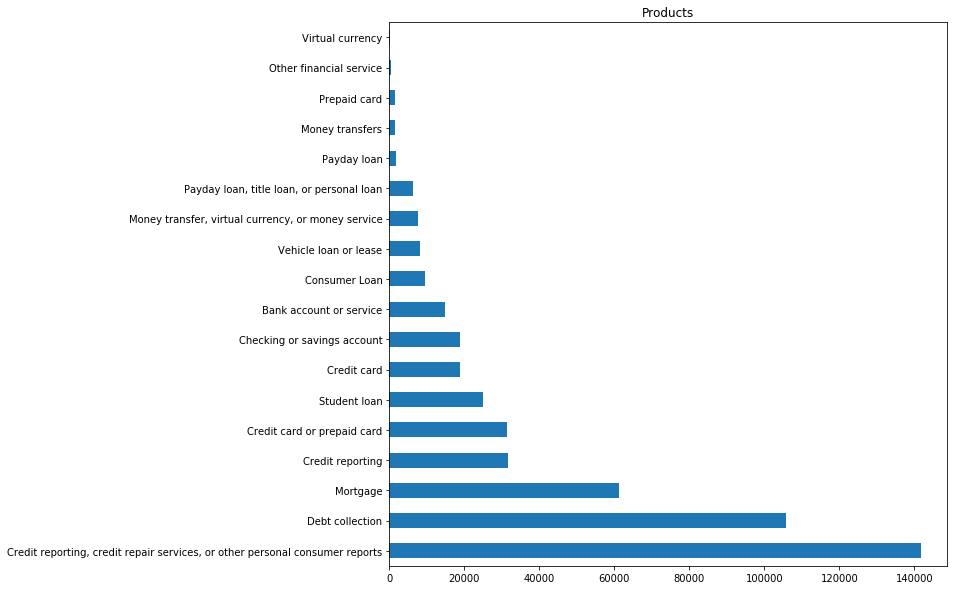

In [5]:
data["Product"].value_counts().plot(kind='barh', title="Products", figsize=(10,10))
plt.show()

Van sommige categorieën zijn er heel weinig datapunten, deze kunnen misschien zorden weggefilterd


### Een voorbeeld van 1 product, nl. Debt collection


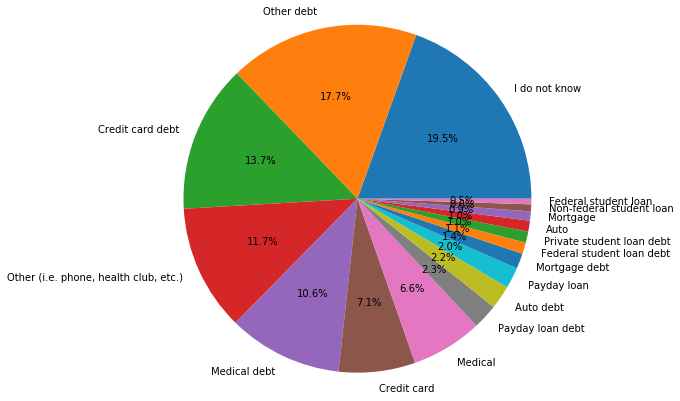

In [6]:
# = data[["Product", "Sub-product"]]
products = data["Product"].unique()

debt = data[data["Product"] == "Debt collection"]
subProdCount = debt["Sub-product"].value_counts()#[:10]

#plt.title("Debt Collection")
plt.pie(subProdCount.values, labels = subProdCount.index, radius = 2, autopct="%.1f%%",)
plt.show()



### Alle producten overlopen waarbij er enkel naar d e10 meest voorkomende subproducten wordt gekeken


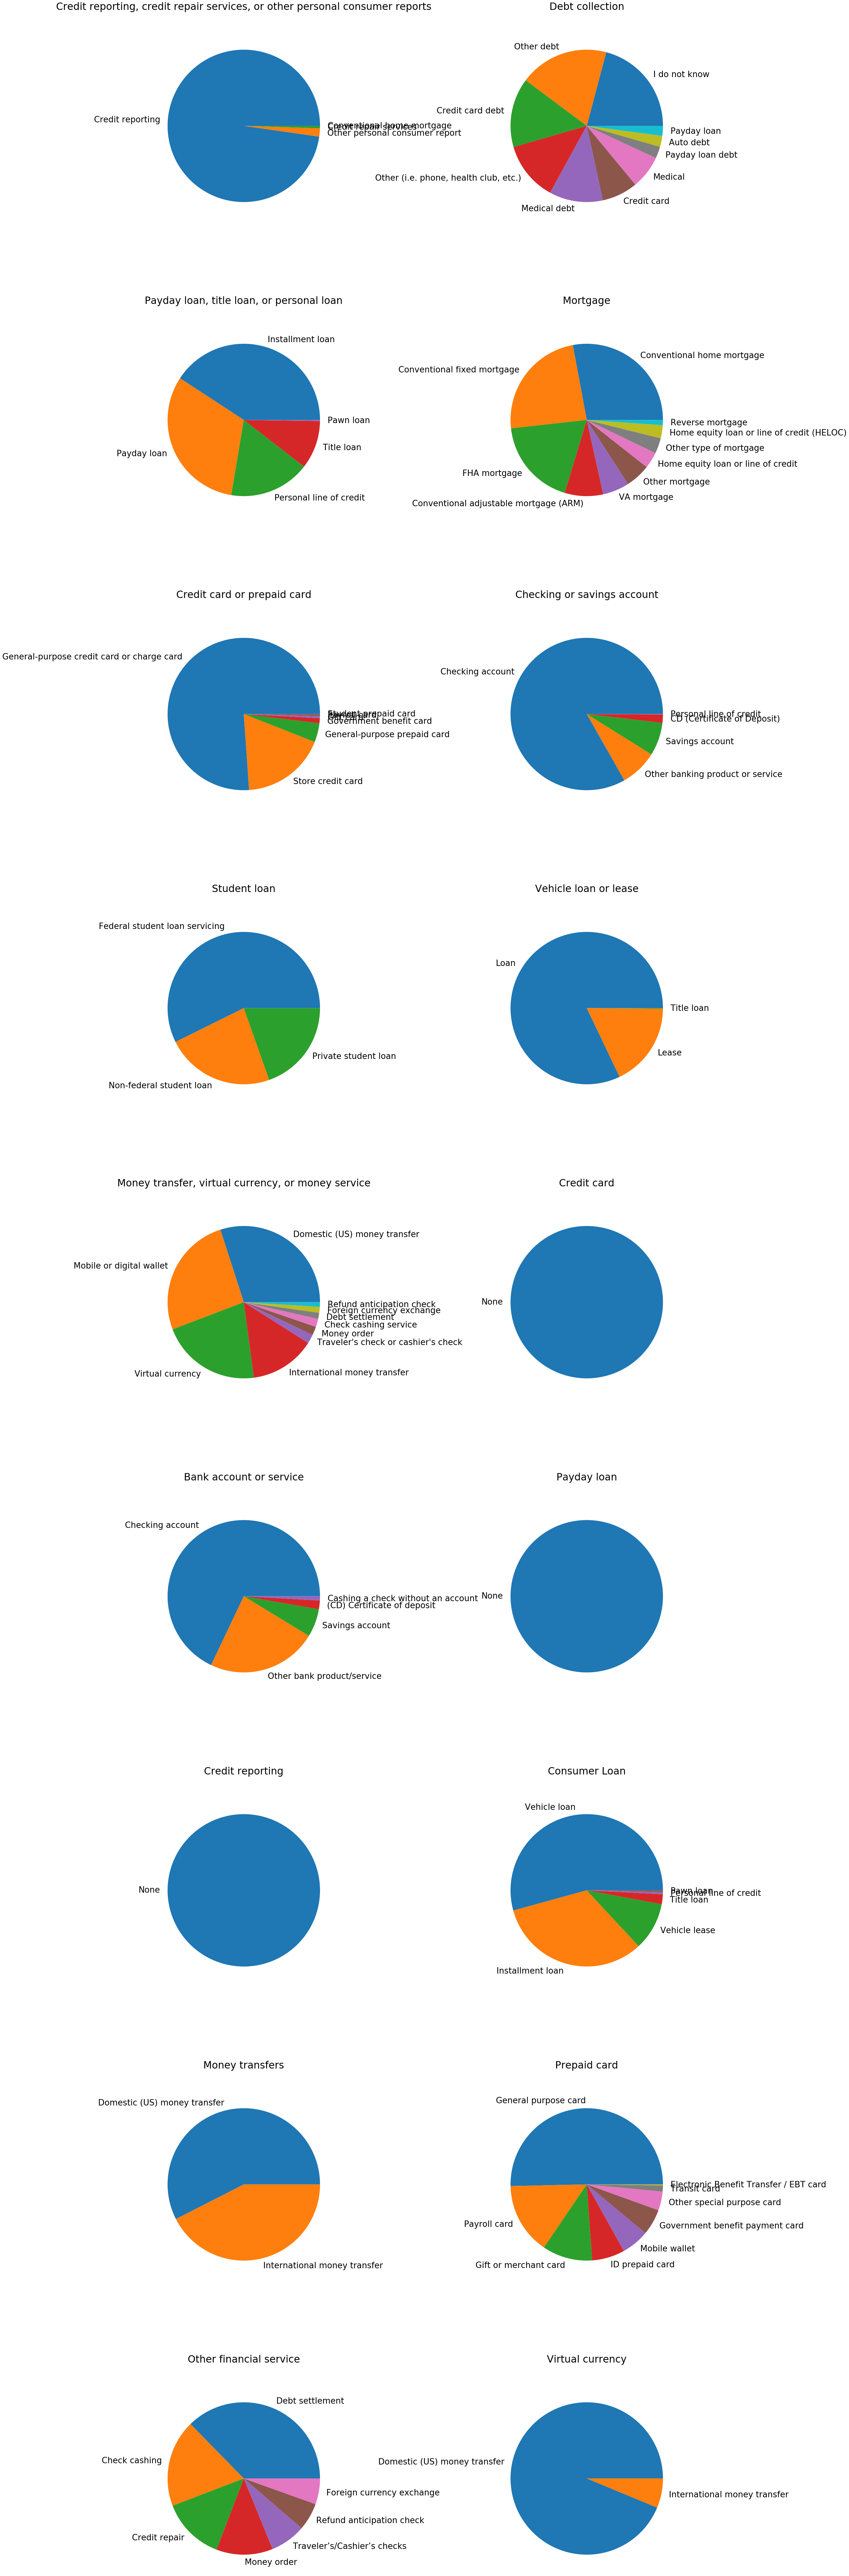

In [7]:
names = [x for x in products]
#print(len(names))


fig = plt.figure(figsize = (30,150))
plt.rcParams.update({'font.size': 26})
fig.subplots_adjust(hspace=0.2, wspace=0.8)
i = 0
for n in names:
    i = i + 1
    subplt = fig.add_subplot(9,2,i)
    subplt.set_title(n, y=1.1)
    x = data[data["Product"] == n]
    counts = x["Sub-product"].value_counts()[:10]
    plt.pie(counts.values, labels = counts.index, radius=1)
plt.show()

Subproduct wordt niet steeds ingevuld, bij sommige producten zijn er veel onderliggende categorieën maar voor anderen is er vaak één dominerende catergorie, of zelfs geen categorie (vb. Credit card).

## Analyseren issues en subissues


In [14]:
#data["Issue"].value_counts().plot(kind='barh', title="Products", figsize=(10,10))


### Voor elk product kijken wat de meest voorkomende issues zijn

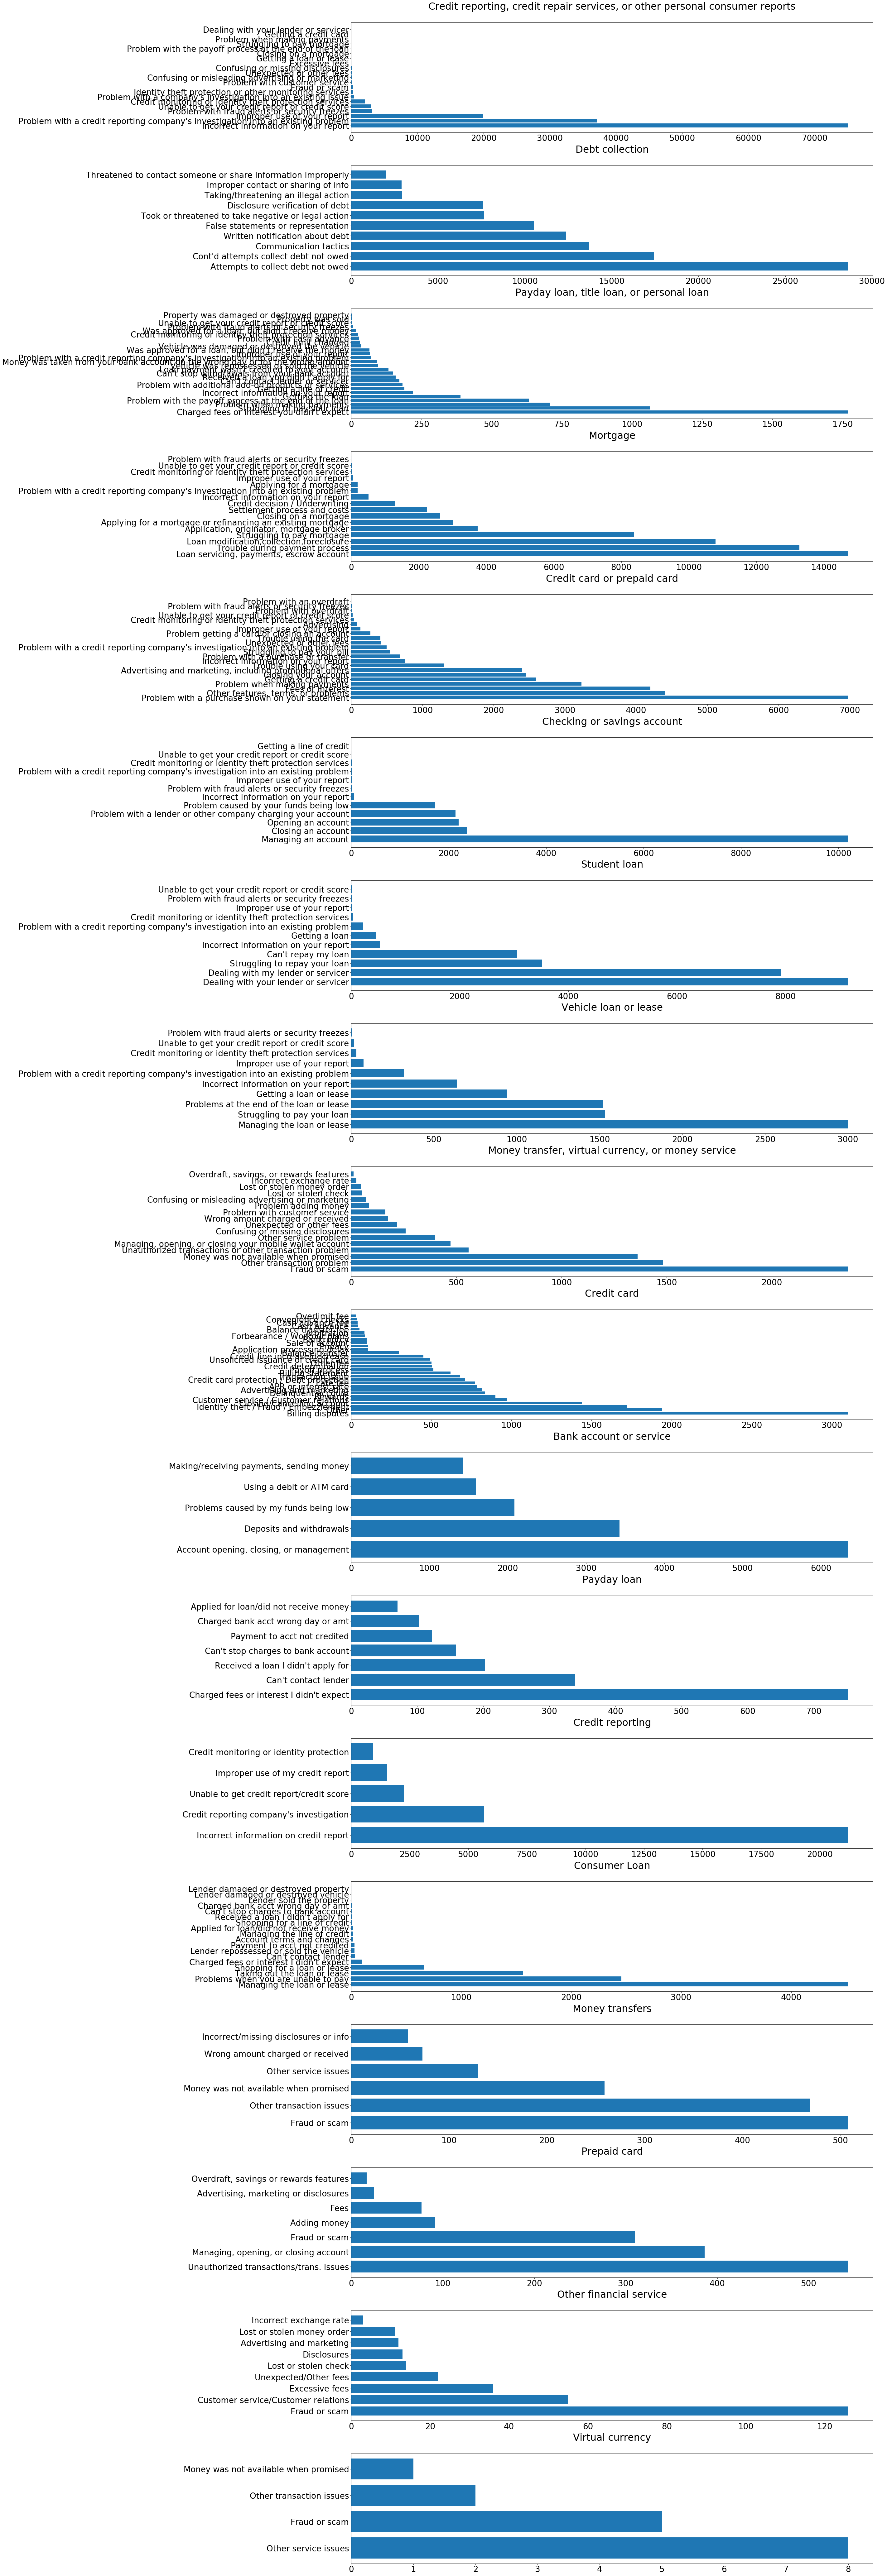

In [8]:
names = [x for x in products]
#print(len(names))


fig = plt.figure(figsize = (30,150))
plt.rcParams.update({'font.size': 26})
fig.subplots_adjust(hspace=0.3)
i = 0
for n in names:
    i = i + 1
    ax = fig.add_subplot(18,1,i)
    ax.set_title(n, y=1.1)
    x = data[data["Product"] == n]
    counts = x["Issue"].value_counts()

    y_pos = np.arange(len(counts))
    ax.barh(y_pos, counts.values, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(counts.index)
    
plt.show()

### Voorbeeld: Debt Collection, issue: Attempts to collect debt not owed

Issue en sub-product zijn niet perse gelinkt (eens nagaan voor meer issues), hier worden alle sub-producten geprint van dat issue 

In [32]:
debtcol = data[(data["Product"] == "Debt collection") & (data["Issue"] == "Attempts to collect debt not owed")]
debtcol["Sub-product"].value_counts()
#data["Consumer complaint narrative"]

Other debt                   9363
I do not know                5863
Credit card debt             5545
Medical debt                 5264
Auto debt                     751
Mortgage debt                 600
Payday loan debt              595
Federal student loan debt     356
Private student loan debt     292
Name: Sub-product, dtype: int64

In [33]:
debtcol["Sub-issue"].value_counts()

Debt is not yours                                                  14708
Debt was paid                                                       6413
Debt was result of identity theft                                   6017
Debt was already discharged in bankruptcy and is no longer owed     1491
Name: Sub-issue, dtype: int64